QUESTION ONE

In [31]:
import matplotlib.pyplot as plt
import json

numbers = open("numbers.txt", "r")
num_list = numbers.read().replace('\n', ',').split(',')

max_num = 0
for i in num_list:
    if int(i) > max_num:
        max_num = int(i)

counts = {}
for i in range(max_num + 1):
    counts[str(i)] = num_list.count(str(i))

In [63]:
for num, count in counts.items():
    print('There are', count, 'occurances of', num)

There are 9 occurances of 0
There are 14 occurances of 1
There are 19 occurances of 2
There are 20 occurances of 3
There are 22 occurances of 4
There are 10 occurances of 5
There are 26 occurances of 6
There are 17 occurances of 7
There are 13 occurances of 8
There are 24 occurances of 9
There are 14 occurances of 10


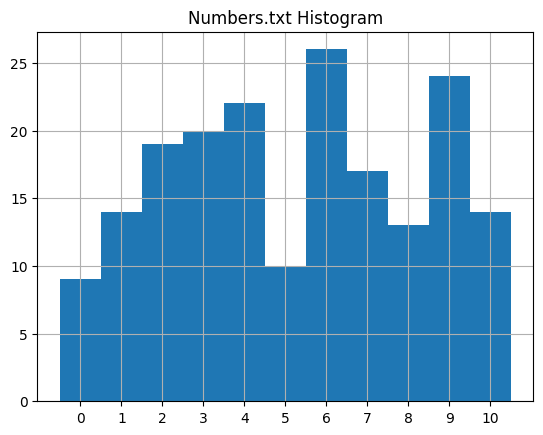

In [64]:
plt.bar(counts.keys(), counts.values(), width=1)
plt.grid()
plt.title('Numbers.txt Histogram')
plt.show()

In [65]:
with open('numbers_counts.json', 'w') as out:
    json.dump(counts, out)

QUESTION TWO

In [101]:
import pandas as pd
import numpy as np

df = pd.read_csv('amazon-orders.csv')

df['Flt_Subtotal'] = df['Subtotal'].apply(lambda x: float(x[1:]))
df['Month'] = df['Order Date'].apply(lambda x: x[0:2])

summary = df.groupby('Month')['Flt_Subtotal'].agg(['count', 'sum', 'mean', 'median', 'min', 'max', 'std'])
total = df['Flt_Subtotal'].agg(['count', 'sum', 'mean', 'median', 'min', 'max', 'std'])
summary

,count,sum,mean,median,min,max,std
Month,,,,,,,
04,10,385.29,38.529000,31.150,9.99,147.98,40.413033
05,18,287.12,15.951111,11.985,7.20,38.89,10.318571
06,6,129.05,21.508333,12.930,10.59,51.99,16.438230
07,25,936.77,37.470800,15.950,0.52,199.99,44.683811


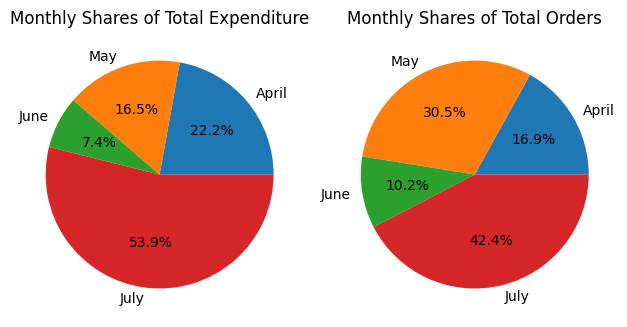

In [119]:
plt.subplot(1,2,1)
plt.pie(summary.loc[:,'sum'], labels = ['April', 'May', 'June', 'July'], autopct='%.1f%%')
plt.title('Monthly Shares of Total Expenditure')

plt.subplot(1,2,2)
plt.pie(summary.loc[:,'count'], labels = ['April', 'May', 'June', 'July'], autopct='%.1f%%')
plt.title('Monthly Shares of Total Orders')

plt.tight_layout()
plt.show()

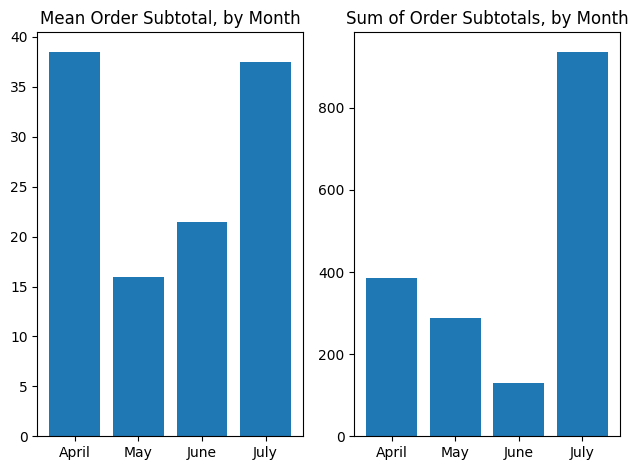

In [120]:
plt.subplot(1,2,1)
plt.bar(['April', 'May', 'June', 'July'], summary.loc[:,'mean'])
plt.title('Mean Order Subtotal, by Month')

plt.subplot(1,2,2)
plt.bar(['April', 'May', 'June', 'July'], summary.loc[:,'sum'])
plt.title('Sum of Order Subtotals, by Month')

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

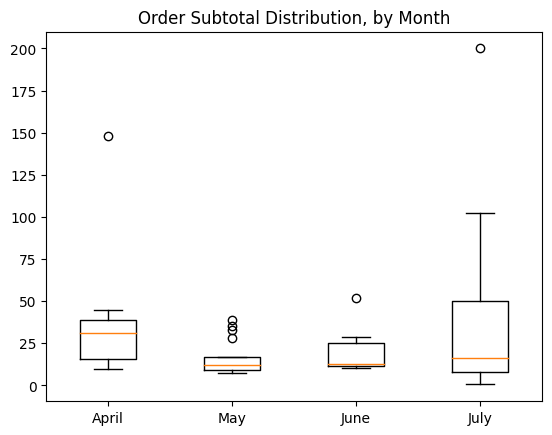

In [107]:
april = df['Flt_Subtotal'][df['Month'] == '04']
may = df['Flt_Subtotal'][df['Month'] == '05']
june = df['Flt_Subtotal'][df['Month'] == '06']
july = df['Flt_Subtotal'][df['Month'] == '07']

data = [april, may, june, july]
fig, ax = plt.subplots()
ax.boxplot(data)
ax.set_xticklabels(['April', 'May', 'June', 'July'])
plt.title('Order Subtotal Distribution, by Month')
plt.show()

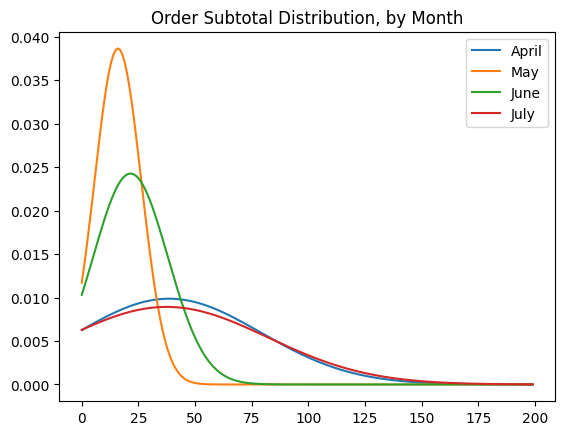

In [108]:
from scipy.stats import norm
x = np.arange(0, df['Flt_Subtotal'].max(), 1)

plt.plot(x, norm.pdf(x, summary.loc['04', 'mean'], summary.loc['04', 'std']), label = 'April')
plt.plot(x, norm.pdf(x, summary.loc['05', 'mean'], summary.loc['05', 'std']), label = 'May')
plt.plot(x, norm.pdf(x, summary.loc['06', 'mean'], summary.loc['06', 'std']), label = 'June')
plt.plot(x, norm.pdf(x, summary.loc['07', 'mean'], summary.loc['07', 'std']), label = 'July')
plt.legend()
plt.title('Order Subtotal Distribution, by Month')
plt.show()